<a href="https://colab.research.google.com/github/RaviB20313/Face-Mask-Detector/blob/main/Face_Mask_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install kaggle

In [7]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing FaceMask Dataset


In [10]:
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [11]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


Importing Dependencies


In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [13]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2401.jpg', 'with_mask_1339.jpg', 'with_mask_2679.jpg', 'with_mask_48.jpg', 'with_mask_132.jpg']
['with_mask_757.jpg', 'with_mask_3004.jpg', 'with_mask_617.jpg', 'with_mask_2812.jpg', 'with_mask_3696.jpg']


In [14]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1000.jpg', 'without_mask_716.jpg', 'without_mask_3569.jpg', 'without_mask_106.jpg', 'without_mask_1559.jpg']
['without_mask_1112.jpg', 'without_mask_277.jpg', 'without_mask_642.jpg', 'without_mask_2635.jpg', 'without_mask_1921.jpg']


In [15]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


##Creating Labels for the two class of Images

With mask->1

without mask->0

In [16]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [17]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [18]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [19]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


displaying with mask image

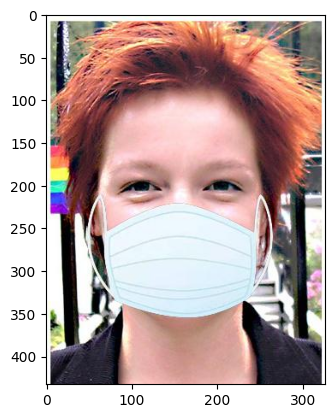

In [23]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1505.jpg')
imgplot = plt.imshow(img)
plt.show()

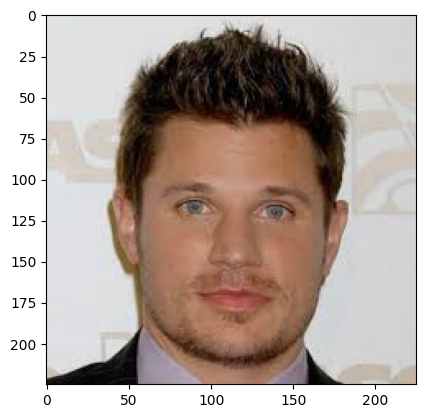

In [22]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2905.jpg')
imgplot = plt.imshow(img)
plt.show()

Image processing

1. Resize the images
2. Convert the image to numpy arrays.

In [24]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [25]:
type(data)

list

In [26]:
len(data)

7553

In [27]:
data[0]

array([[[211, 213, 202],
        [210, 213, 202],
        [210, 213, 202],
        ...,
        [169, 170, 162],
        [169, 170, 162],
        [167, 170, 161]],

       [[211, 214, 203],
        [211, 214, 203],
        [211, 214, 204],
        ...,
        [170, 171, 163],
        [169, 170, 162],
        [168, 171, 162]],

       [[212, 215, 205],
        [212, 215, 205],
        [212, 215, 205],
        ...,
        [171, 172, 164],
        [170, 171, 163],
        [169, 172, 163]],

       ...,

       [[240, 237, 222],
        [239, 236, 221],
        [237, 233, 221],
        ...,
        [175, 177, 172],
        [185, 187, 182],
        [182, 184, 179]],

       [[239, 236, 221],
        [238, 235, 220],
        [236, 233, 220],
        ...,
        [144, 146, 141],
        [162, 164, 159],
        [177, 180, 174]],

       [[237, 233, 221],
        [238, 234, 222],
        [237, 233, 222],
        ...,
        [148, 150, 142],
        [143, 146, 137],
        [148, 151, 144]]

In [28]:
type(data[0])

numpy.ndarray

In [29]:
data[0].shape

(128, 128, 3)

In [30]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [31]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [32]:
print(Y)

[1 1 1 ... 0 0 0]


Train Test split


In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [34]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [35]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [36]:
X_train[0]

array([[[225, 195, 205],
        [217, 187, 197],
        [209, 180, 190],
        ...,
        [ 99,  21,  78],
        [ 98,  21,  77],
        [ 97,  20,  76]],

       [[237, 207, 219],
        [223, 193, 205],
        [209, 179, 191],
        ...,
        [ 99,  20,  79],
        [ 99,  22,  79],
        [ 99,  22,  78]],

       [[244, 214, 228],
        [223, 192, 207],
        [198, 167, 183],
        ...,
        [ 98,  20,  79],
        [ 98,  20,  78],
        [ 97,  19,  76]],

       ...,

       [[ 20,  15,  17],
        [ 22,  17,  17],
        [ 26,  18,  18],
        ...,
        [ 12,   9,   7],
        [ 11,   9,   8],
        [ 11,   9,  10]],

       [[ 20,  14,  16],
        [ 21,  13,  15],
        [ 23,  13,  14],
        ...,
        [ 11,  10,   8],
        [ 11,  10,   9],
        [ 11,   9,  10]],

       [[ 20,  14,  16],
        [ 20,  12,  14],
        [ 21,  11,  13],
        ...,
        [ 11,   9,   7],
        [ 11,  10,   9],
        [ 11,   9,  10]]

In [37]:
X_train_scaled[0]

array([[[0.88235294, 0.76470588, 0.80392157],
        [0.85098039, 0.73333333, 0.77254902],
        [0.81960784, 0.70588235, 0.74509804],
        ...,
        [0.38823529, 0.08235294, 0.30588235],
        [0.38431373, 0.08235294, 0.30196078],
        [0.38039216, 0.07843137, 0.29803922]],

       [[0.92941176, 0.81176471, 0.85882353],
        [0.8745098 , 0.75686275, 0.80392157],
        [0.81960784, 0.70196078, 0.74901961],
        ...,
        [0.38823529, 0.07843137, 0.30980392],
        [0.38823529, 0.08627451, 0.30980392],
        [0.38823529, 0.08627451, 0.30588235]],

       [[0.95686275, 0.83921569, 0.89411765],
        [0.8745098 , 0.75294118, 0.81176471],
        [0.77647059, 0.65490196, 0.71764706],
        ...,
        [0.38431373, 0.07843137, 0.30980392],
        [0.38431373, 0.07843137, 0.30588235],
        [0.38039216, 0.0745098 , 0.29803922]],

       ...,

       [[0.07843137, 0.05882353, 0.06666667],
        [0.08627451, 0.06666667, 0.06666667],
        [0.10196078, 0

Building a Convolutional Neural Networks

In [38]:
import tensorflow as tf
from tensorflow import keras

In [39]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [40]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [41]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 10s 24ms/step - loss: 0.5194 - acc: 0.7865 - val_loss: 0.3072 - val_acc: 0.8793
Epoch 2/5
170/170 [==============================] - 3s 19ms/step - loss: 0.2991 - acc: 0.8913 - val_loss: 0.2508 - val_acc: 0.8942
Epoch 3/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2578 - acc: 0.9038 - val_loss: 0.2686 - val_acc: 0.8926
Epoch 4/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1998 - acc: 0.9237 - val_loss: 0.2598 - val_acc: 0.9058
Epoch 5/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1700 - acc: 0.9375 - val_loss: 0.3146 - val_acc: 0.8992


In [42]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 1s 11ms/step - loss: 0.2161 - acc: 0.9193
Test Accuracy = 0.9192587733268738


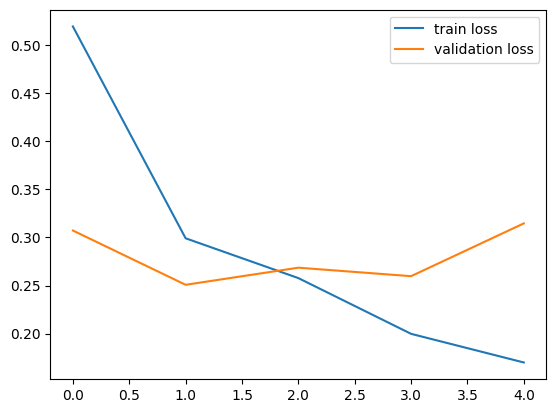

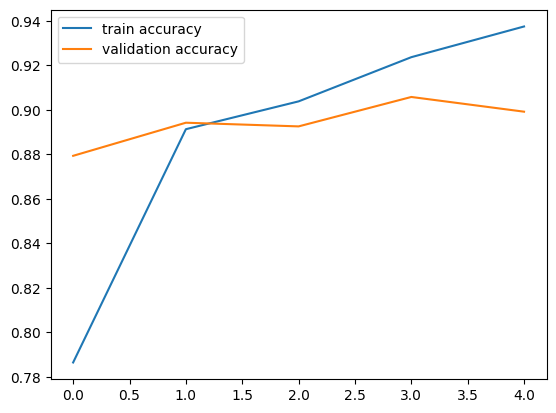

In [43]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Prediction System

Path of the image to be predicted: /content/without_mask_sample.jpg


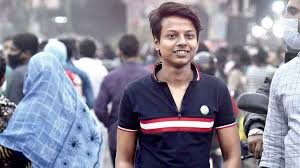

1/1 [==============================] - 0s 17ms/step
[[0.58524954 0.4366005 ]]
0
The person in the image is not wearing a mask


In [45]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')